In [22]:
import json

# Load the JSON data
def read_json(file): #'Chinese16\Chinese16_000000000000_keypoints.json'
    with open(file, 'r') as file:
        data = json.load(file)

    # Extract part_candidates
    part_candidates = data['part_candidates'][0]

    # Print the extracted part_candidates
    # print("Part Candidates:")
    # for key, value in part_candidates.items():
        # print(f"Part {key}: {value}")
    return part_candidates

{0,  "Nose"},
{1,  "Neck"},
{2,  "RShoulder"},
{3,  "RElbow"},
{4,  "RWrist"},
{5,  "LShoulder"},
{6,  "LElbow"},
{7,  "LWrist"},
{8,  "MidHip"},
{9,  "RHip"},
{10, "RKnee"},
{11, "RAnkle"},
{12, "LHip"},
{13, "LKnee"},
{14, "LAnkle"},
{15, "REye"},
{16, "LEye"},
{17, "REar"},
{18, "LEar"},
{19, "LBigToe"},
{20, "LSmallToe"},
{21, "LHeel"},
{22, "RBigToe"},
{23, "RSmallToe"},
{24, "RHeel"},
{25, "Background"}

                Initial_side    Vertex          Terminal_Side
0   0-1-2       Nose            Neck            RShoulder
1   0-1-5       Nose            Neck            LShoulder
2   1-2-3       Neck            RShoulder       RElbow
3   1-5-6       Neck            LShoulder       LElbow
4   2-3-4       RShoulder       RElbow          RWrist
5   5-6-7       LShoulder       LElbow          LWrist
6   9-2-3       RHip            RShoulder       RElbow
7   12-5-6      LHip            LShoulder       LElbow
8   8-9-2       MidHip          RHip            RShoulder
9   8-12-5      MidHip          LHip            LShoulder
10  8-9-10      MidHip          RHip            RKnee
11  8-12-13     MidHip          LHip            LKnee
12  9-10-11     RHip            RKnee           RAnkle
13  12-13-14    LHip            LKnee           LAnkle
14  10-11-22    RKnee           RAnkle          RBigToe
15  13-14-19    LKnee           LAnkle          LBigToe

In [23]:
angle_indices = [
    ['0', '1', '2'],
    ['0', '1', '5'],
    ['1', '2', '3'],
    ['1', '5', '6'],
    ['2', '3', '4'],
    ['5', '6', '7'],
    ['9', '2', '3'],
    ['12', '5', '6'],
    ['8', '9', '2'],
    ['8', '12', '5'],
    ['8', '9', '10'],
    ['8', '12', '13'],
    ['9', '10', '11'],
    ['12', '13', '14'],
    ['10', '11', '22'],
    ['13', '14', '19']
]

import math
def calculate_angle(initial_side, vertex, terminal_side):
    # Calculate the vectors representing the initial side and terminal side
    vector1 = (initial_side[0] - vertex[0], initial_side[1] - vertex[1])
    vector2 = (terminal_side[0] - vertex[0], terminal_side[1] - vertex[1])
    # Calculate the dot product of the two vectors
    dot_product = vector1[0] * vector2[0] + vector1[1] * vector2[1]
    # Calculate the magnitudes of the vectors
    magnitude1 = math.sqrt(vector1[0] ** 2 + vector1[1] ** 2)
    magnitude2 = math.sqrt(vector2[0] ** 2 + vector2[1] ** 2)
    # Calculate the angle between the two vectors using arctangent
    angle_rad = math.acos(dot_product / (magnitude1 * magnitude2))
    angle_deg = math.degrees(angle_rad)
    return angle_deg

def calculate_angles(part_candidates):
    angles = []
    for angle_index in angle_indices:
        angles.append(calculate_angle(
            [part_candidates[angle_index[0]][0], part_candidates[angle_index[0]][1]],
            [part_candidates[angle_index[1]][0], part_candidates[angle_index[1]][1]],
            [part_candidates[angle_index[2]][0], part_candidates[angle_index[2]][1]]
        ))
    return angles
print(calculate_angles(read_json("Chinese16\Chinese16_000000000000_keypoints.json")))

FileNotFoundError: [Errno 2] No such file or directory: 'Chinese16\\Chinese16_000000000000_keypoints.json'

In [ ]:
def reorganize_sets(msets):
    # Initialize the reorganized sets
    reorganized_sets = [[] for _ in range(25)]
    person = 0
    # Iterate through each set of arrays
    for set_index, set_array in enumerate(msets):
        # Iterate through each array in the set
        # for ii in range(len(msets)):
        # Extract x, y coordinates from the array
        for key, values in msets[set_index].items():
            part_index = int(key)
            x = values[person * 3]
            y = values[person * 3 + 1]
            # Append [x, y] to the corresponding reorganized set
            reorganized_sets[part_index].append([x, y]) #set_index = index of element

    return reorganized_sets

In [ ]:
import os

directory = "Chinese16"
sets = []

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    sets.append(read_json(filepath))
# print(sets)

In [24]:
reorganized_sets = reorganize_sets(sets)
print(reorganized_sets)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [25]:
import matplotlib.pyplot as plt

def plot_coordinates(coordinates):
    x_values = [coord[0] for coord in coordinates]
    y_values = [coord[1] for coord in coordinates]
    indices = list(range(len(coordinates)))

    # Plot x-coordinates against indices
    plt.plot(indices, x_values, marker='o', linestyle='-', color='b', label='x-coordinates')
    plt.xlabel('Index')
    plt.ylabel('X-coordinate')
    plt.title('X-coordinate vs Index')
    plt.legend()
    plt.show()

    # Plot y-coordinates against indices
    plt.plot(indices, y_values, marker='o', linestyle='-', color='r', label='y-coordinates')
    plt.xlabel('Index')
    plt.ylabel('Y-coordinate')
    plt.title('Y-coordinate vs Index')
    plt.legend()
    plt.show()

# plot_coordinates(reorganized_sets[0])
def plot_coordinates_with_derivatives_and_angles(derivatives_and_angles):
    indices = list(range(len(derivatives_and_angles)))

    # Plot x-coordinates derivatives against indices
    plt.plot(indices, derivatives_and_angles[:, 0], marker='o', linestyle='-', color='b', label='x-derivative')
    plt.xlabel('Index')
    plt.ylabel('X-coordinate Derivative')
    plt.title('X-coordinate Derivative vs Index')
    plt.legend()
    plt.show()

    # Plot y-coordinates derivatives against indices
    plt.plot(indices, derivatives_and_angles[:, 1], marker='o', linestyle='-', color='r', label='y-derivative')
    plt.xlabel('Index')
    plt.ylabel('Y-coordinate Derivative')
    plt.title('Y-coordinate Derivative vs Index')
    plt.legend()
    plt.show()

    # Plot angles against indices
    plt.plot(indices, derivatives_and_angles[:, 2], marker='o', linestyle='-', color='g', label='angle (degrees)')
    plt.xlabel('Index')
    plt.ylabel('Angle (degrees)')
    plt.title('Angle vs Index')
    plt.legend()
    plt.show()

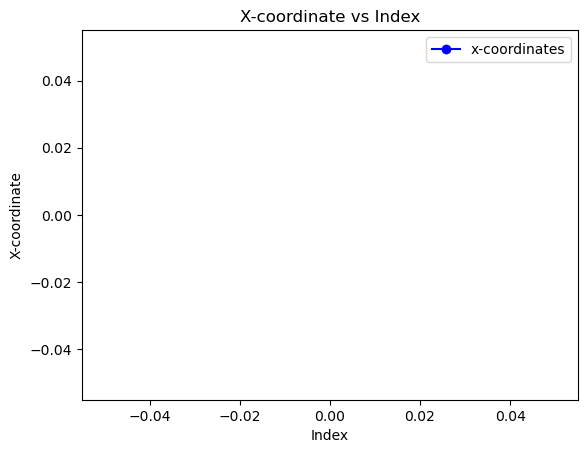

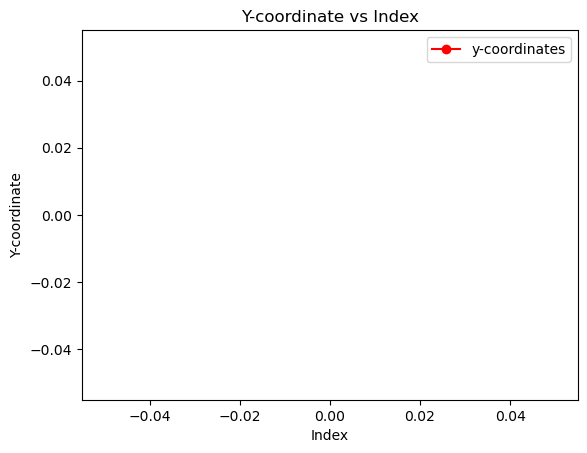

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [26]:
import numpy as np

def calculate_derivatives_and_angles(coordinates):
    # Convert coordinates to numpy array for easier manipulation
    coordinates = np.array(coordinates)

    # Calculate the derivatives
    x_deriv = np.gradient(coordinates[:, 0])
    y_deriv = np.gradient(coordinates[:, 1])

    # Calculate the angles
    angles = np.arctan2(y_deriv, x_deriv)

    # Convert angles to degrees for better interpretation
    angles_deg = np.degrees(angles)

    # Combine derivatives and angles into a new 2D array
    derivatives_and_angles = np.column_stack((x_deriv, y_deriv, angles_deg))

    return derivatives_and_angles

for set in reorganized_sets:
    plot_coordinates(set)
    deriv_angles = calculate_derivatives_and_angles(set)
    plot_coordinates_with_derivatives_and_angles(deriv_angles)

In [77]:
def calculate_angle_distance(angles1, angles2, threshold=20): # threshold mainly takes away from the calculated distance
    # Convert angle lists to numpy arrays 
    angles1 = np.array(angles1)
    angles2 = np.array(angles2)
    
    # threshold: 
    differences = np.abs(angles1 - angles2)
    differences = np.where(differences < threshold, 0, differences - threshold)
    
    # Calculate Euclidean distance between the two sets of angles
    distance = np.linalg.norm(differences) # if applying threshold change (angles1 - angles2) to differences
    return distance

# MARGIN OF ERROR 

def score_similarity(distance, scale=1, margin=50): # margin of error 
    adjusted_distance = max(0, distance - margin)
    score = 1 / (1 + adjusted_distance * scale) #Adjust scale for sensitivity  
    return score

def get_count_and_process(directory_pro, directory_test): 
    count = 0
    
    files_pro = [f for f in os.listdir(directory_pro) if os.path.isfile(os.path.join(directory_pro, f))]
    files_test = [f for f in os.listdir(directory_test) if os.path.isfile(os.path.join(directory_test, f))]
    
    print('Files in directory "{}": {}'.format(directory_pro, len(files_pro)))
    print('Files in directory "{}": {}'.format(directory_test, len(files_test)))
    
    if len(files_pro) != len(files_test):
        print("Directories don't have the same number of files")
        return
    
    distances = []
    for file_pro, file_test in zip(sorted(files_pro), sorted(files_test)):
        angles_frame_pro = calculate_angles(read_json(os.path.join(directory_pro, file_pro)))
        angles_frame_test = calculate_angles(read_json(os.path.join(directory_test, file_test)))
        
        distance = calculate_angle_distance(angles_frame_pro, angles_frame_test)
        distances.append(distance)
    
    if distances:
        average_distance = np.mean(distances)
        similarity_score = score_similarity(average_distance)
        print("Average Distance: ", average_distance)
        print("Similarity Score: ", similarity_score)

directory_pro = "single_leg_balance_pro_dir"
directory_test = "single_leg_balance_test2_dir"

get_count_and_process(directory_pro, directory_test)

Files in directory "single_leg_balance_pro_dir": 478
Files in directory "single_leg_balance_test2_dir": 478
Average Distance:  36.023115148176764
Similarity Score:  1.0
